In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import random 
import seaborn as sns
from prophet import Prophet

In [4]:
avocado_df = pd.read_csv('avocado.csv')
avocado_df.head()

,Unnamed: 0,Date,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,type,year,region
0,0,2015-12-27,1.33,64236.62,1036.74,54454.85,48.16,8696.87,8603.62,93.25,0.0,conventional,2015,Albany
1,1,2015-12-20,1.35,54876.98,674.28,44638.81,58.33,9505.56,9408.07,97.49,0.0,conventional,2015,Albany
2,2,2015-12-13,0.93,118220.22,794.70,109149.67,130.50,8145.35,8042.21,103.14,0.0,conventional,2015,Albany
3,3,2015-12-06,1.08,78992.15,1132.00,71976.41,72.58,5811.16,5677.40,133.76,0.0,conventional,2015,Albany
4,4,2015-11-29,1.28,51039.60,941.48,43838.39,75.78,6183.95,5986.26,197.69,0.0,conventional,2015,Albany


In [6]:
avocado_df = avocado_df.sort_values("Date")
avocado_df.head()

,Unnamed: 0,Date,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,type,year,region
11569,51,2015-01-04,1.75,27365.89,9307.34,3844.81,615.28,13598.46,13061.10,537.36,0.00,organic,2015,Southeast
11829,51,2015-01-04,1.46,612910.15,233286.13,216611.20,4370.99,158641.83,115068.71,43573.12,0.00,organic,2015,TotalUS
11777,51,2015-01-04,1.70,1885.48,748.62,30.19,0.00,1106.67,1106.67,0.00,0.00,organic,2015,Tampa
675,51,2015-01-04,0.99,668086.00,117454.09,429518.41,5553.60,115559.90,67894.33,47661.52,4.05,conventional,2015,Denver
1247,51,2015-01-04,0.92,101162.98,1991.63,75090.16,283.88,23797.31,7769.36,16027.95,0.00,conventional,2015,Louisville


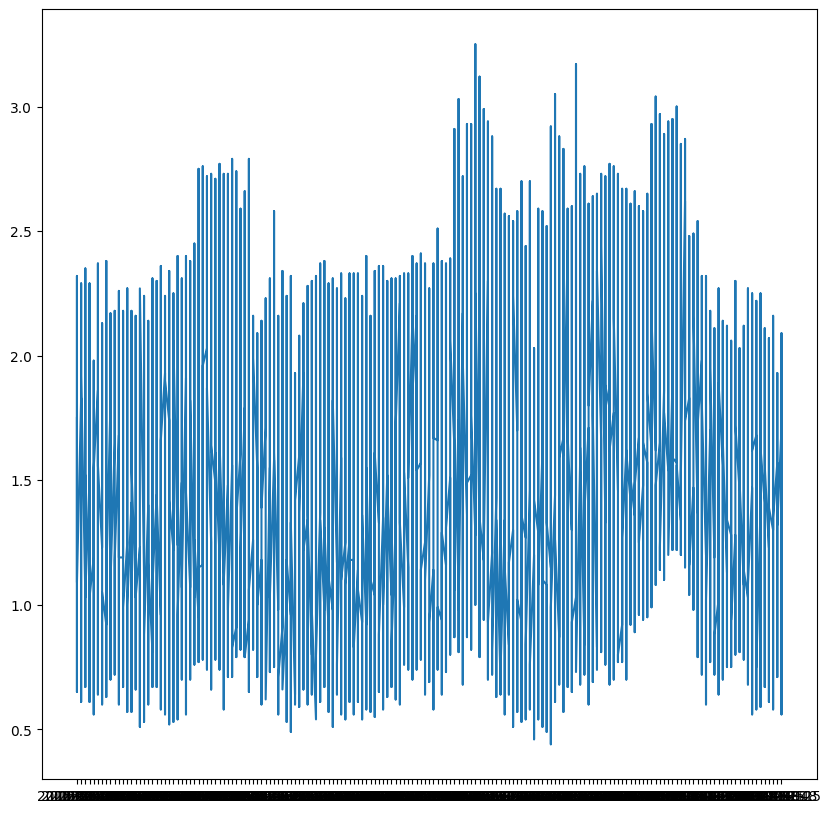

In [7]:
plt.figure(figsize = (10,10))
plt.plot(avocado_df['Date'], avocado_df['AveragePrice'])


([0,
  1,
  2,
  3,
  4,
  5,
  6,
  7,
  8,
  9,
  10,
  11,
  12,
  13,
  14,
  15,
  16,
  17,
  18,
  19,
  20,
  21,
  22,
  23,
  24,
  25,
  26,
  27,
  28,
  29,
  30,
  31,
  32,
  33,
  34,
  35,
  36,
  37,
  38,
  39,
  40,
  41,
  42,
  43,
  44,
  45,
  46,
  47,
  48,
  49,
  50,
  51,
  52,
  53],
 [Text(0, 0, 'Southeast'),
  Text(1, 0, 'TotalUS'),
  Text(2, 0, 'Tampa'),
  Text(3, 0, 'Denver'),
  Text(4, 0, 'Louisville'),
  Text(5, 0, 'HartfordSpringfield'),
  Text(6, 0, 'Charlotte'),
  Text(7, 0, 'Portland'),
  Text(8, 0, 'Nashville'),
  Text(9, 0, 'Columbus'),
  Text(10, 0, 'Sacramento'),
  Text(11, 0, 'NewOrleansMobile'),
  Text(12, 0, 'SanDiego'),
  Text(13, 0, 'LosAngeles'),
  Text(14, 0, 'GreatLakes'),
  Text(15, 0, 'PhoenixTucson'),
  Text(16, 0, 'Indianapolis'),
  Text(17, 0, 'Philadelphia'),
  Text(18, 0, 'Detroit'),
  Text(19, 0, 'Jacksonville'),
  Text(20, 0, 'RichmondNorfolk'),
  Text(21, 0, 'BuffaloRochester'),
  Text(22, 0, 'Northeast'),
  Text(23, 0, 'Sou

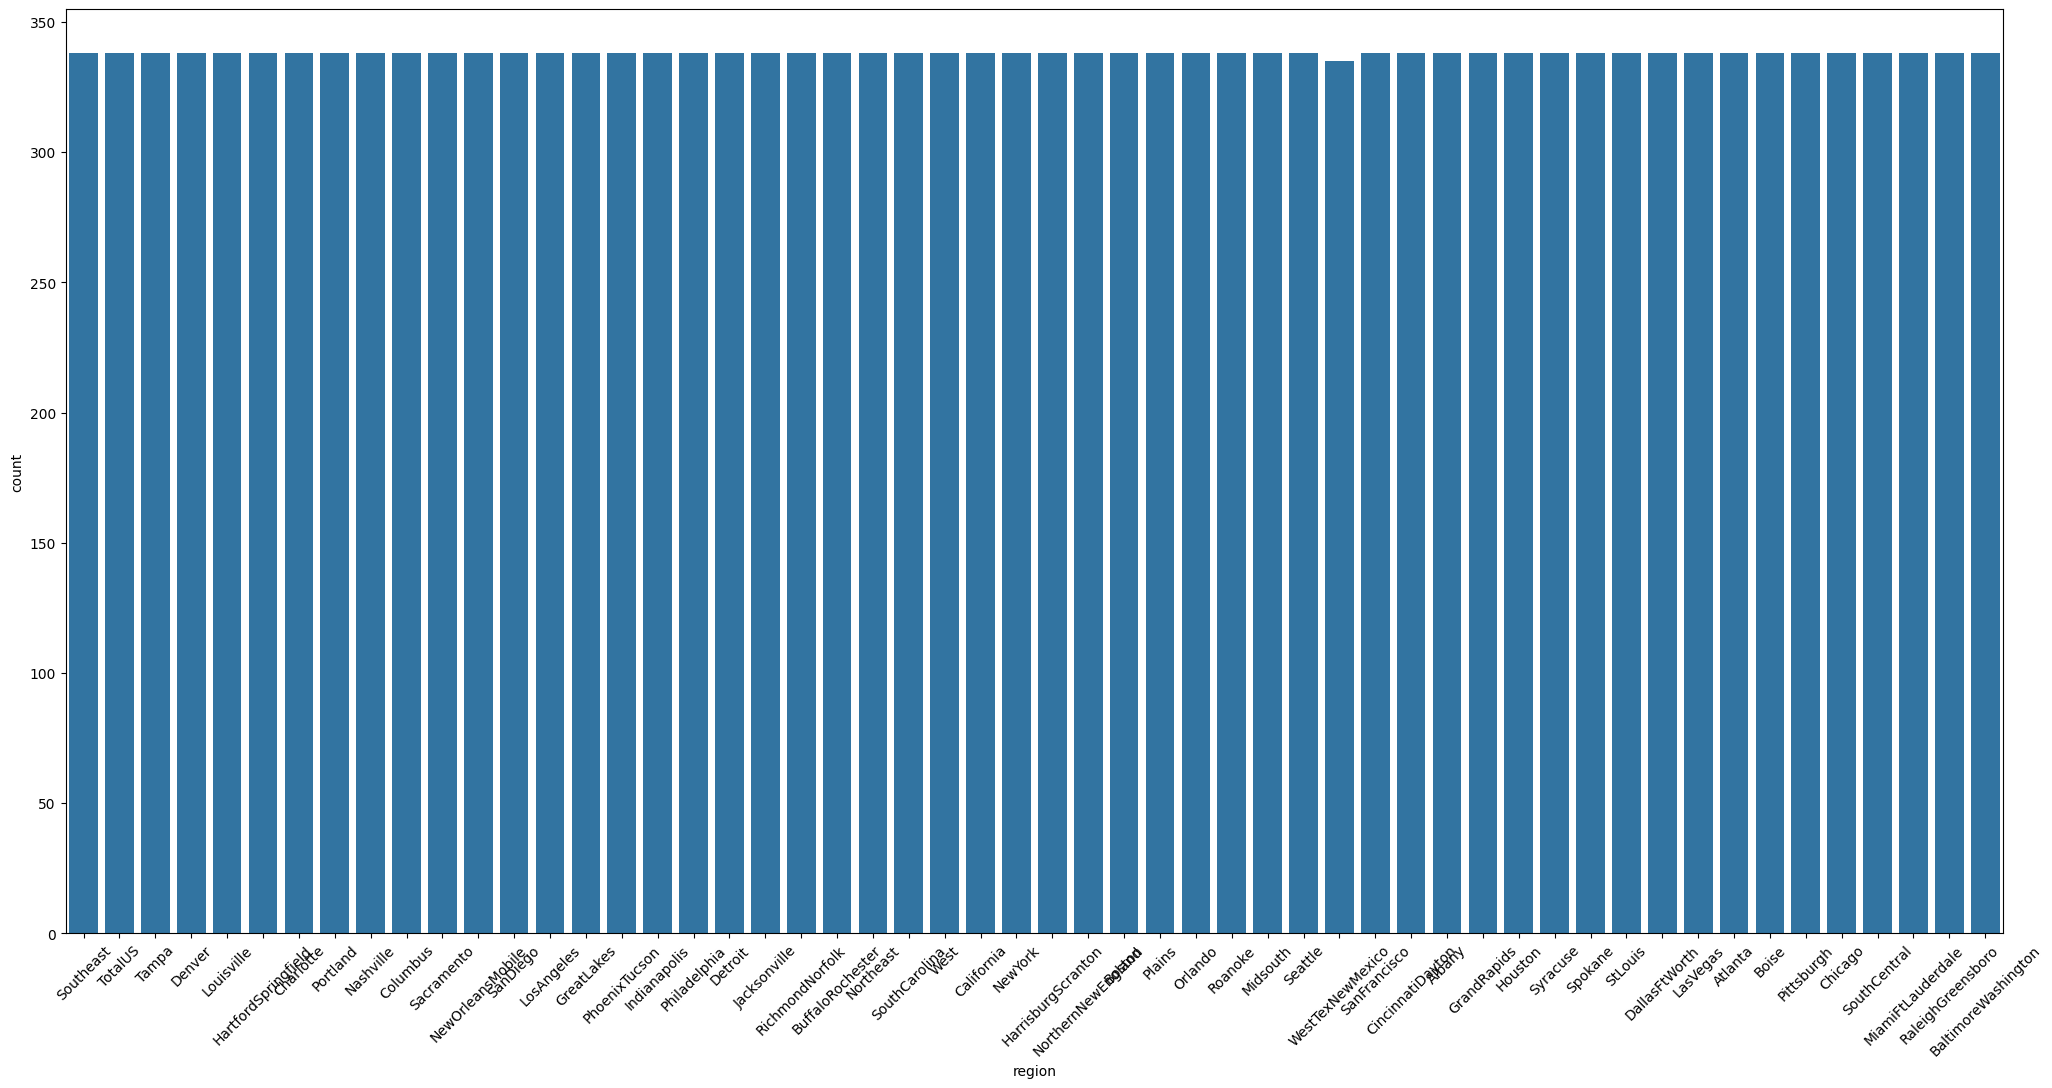

In [10]:
plt.figure(figsize = [25, 12])
sns.countplot(x = 'region', data = avocado_df)
plt.xticks(rotation = 45)

<Axes: xlabel='year', ylabel='count'>

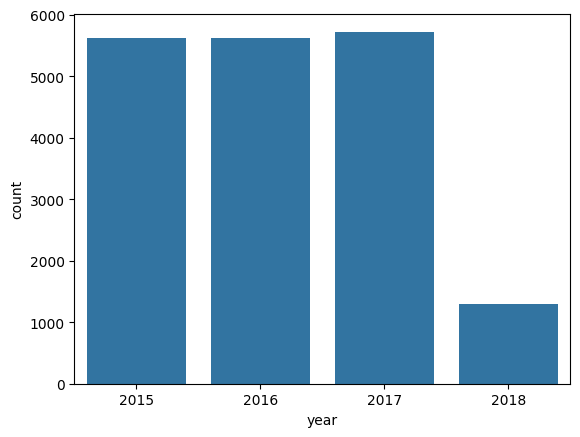

In [11]:
sns.countplot(x = 'year', data = avocado_df)

In [14]:
avocado_prophet_df = avocado_df[['Date', 'AveragePrice']]
avocado_prophet_df.head()

,Date,AveragePrice
11569,2015-01-04,1.75
11829,2015-01-04,1.46
11777,2015-01-04,1.70
675,2015-01-04,0.99
1247,2015-01-04,0.92


In [16]:
avocado_prophet_df = avocado_prophet_df.rename(columns = {'Date': 'ds', 'AveragePrice':'y'})
avocado_prophet_df.head()

,ds,y
11569,2015-01-04,1.75
11829,2015-01-04,1.46
11777,2015-01-04,1.70
675,2015-01-04,0.99
1247,2015-01-04,0.92


In [17]:
m = Prophet()
m.fit(avocado_prophet_df)

23:50:03 - cmdstanpy - INFO - Chain [1] start processing
23:50:06 - cmdstanpy - INFO - Chain [1] done processing


In [18]:
future = m.make_future_dataframe(periods = 365)
forecast = m.predict(future)

In [20]:
forecast.head()

,ds,trend,yhat_lower,yhat_upper,trend_lower,trend_upper,additive_terms,additive_terms_lower,additive_terms_upper,yearly,yearly_lower,yearly_upper,multiplicative_terms,multiplicative_terms_lower,multiplicative_terms_upper,yhat
0,2015-01-04,1.499131,0.913929,1.848740,1.499131,1.499131,-0.114938,-0.114938,-0.114938,-0.114938,-0.114938,-0.114938,0.0,0.0,0.0,1.384192
1,2015-01-11,1.493912,0.952441,1.848781,1.493912,1.493912,-0.106538,-0.106538,-0.106538,-0.106538,-0.106538,-0.106538,0.0,0.0,0.0,1.387374
2,2015-01-18,1.488693,0.907107,1.856648,1.488693,1.488693,-0.106235,-0.106235,-0.106235,-0.106235,-0.106235,-0.106235,0.0,0.0,0.0,1.382459
3,2015-01-25,1.483475,0.865798,1.829657,1.483475,1.483475,-0.125208,-0.125208,-0.125208,-0.125208,-0.125208,-0.125208,0.0,0.0,0.0,1.358267
4,2015-02-01,1.478256,0.860529,1.808471,1.478256,1.478256,-0.153568,-0.153568,-0.153568,-0.153568,-0.153568,-0.153568,0.0,0.0,0.0,1.324689


/Users/hashimkhan/Library/Mobile Documents/com~apple~CloudDocs/machine_learning_practice/scrolls/lib/python3.11/site-packages/prophet/plot.py:72: FutureWarning: The behavior of DatetimeProperties.to_pydatetime is deprecated, in a future version this will return a Series containing python datetime objects instead of an ndarray. To retain the old behavior, call `np.array` on the result
  fcst_t = fcst['ds'].dt.to_pydatetime()
/Users/hashimkhan/Library/Mobile Documents/com~apple~CloudDocs/machine_learning_practice/scrolls/lib/python3.11/site-packages/prophet/plot.py:73: FutureWarning: The behavior of DatetimeProperties.to_pydatetime is deprecated, in a future version this will return a Series containing python datetime objects instead of an ndarray. To retain the old behavior, call `np.array` on the result
  ax.plot(m.history['ds'].dt.to_pydatetime(), m.history['y'], 'k.',


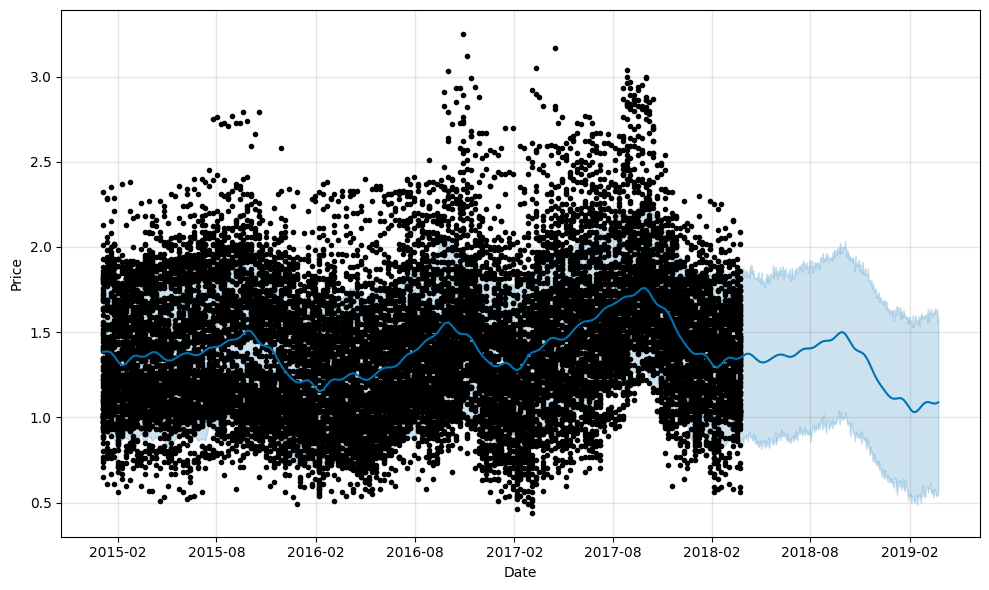

In [21]:
figure = m.plot(forecast, xlabel = 'Date', ylabel = 'Price')

/Users/hashimkhan/Library/Mobile Documents/com~apple~CloudDocs/machine_learning_practice/scrolls/lib/python3.11/site-packages/prophet/plot.py:228: FutureWarning: The behavior of DatetimeProperties.to_pydatetime is deprecated, in a future version this will return a Series containing python datetime objects instead of an ndarray. To retain the old behavior, call `np.array` on the result
  fcst_t = fcst['ds'].dt.to_pydatetime()
/Users/hashimkhan/Library/Mobile Documents/com~apple~CloudDocs/machine_learning_practice/scrolls/lib/python3.11/site-packages/prophet/plot.py:351: FutureWarning: The behavior of DatetimeProperties.to_pydatetime is deprecated, in a future version this will return a Series containing python datetime objects instead of an ndarray. To retain the old behavior, call `np.array` on the result
  df_y['ds'].dt.to_pydatetime(), seas[name], ls='-', c='#0072B2')
/Users/hashimkhan/Library/Mobile Documents/com~apple~CloudDocs/machine_learning_practice/scrolls/lib/python3.11/site-

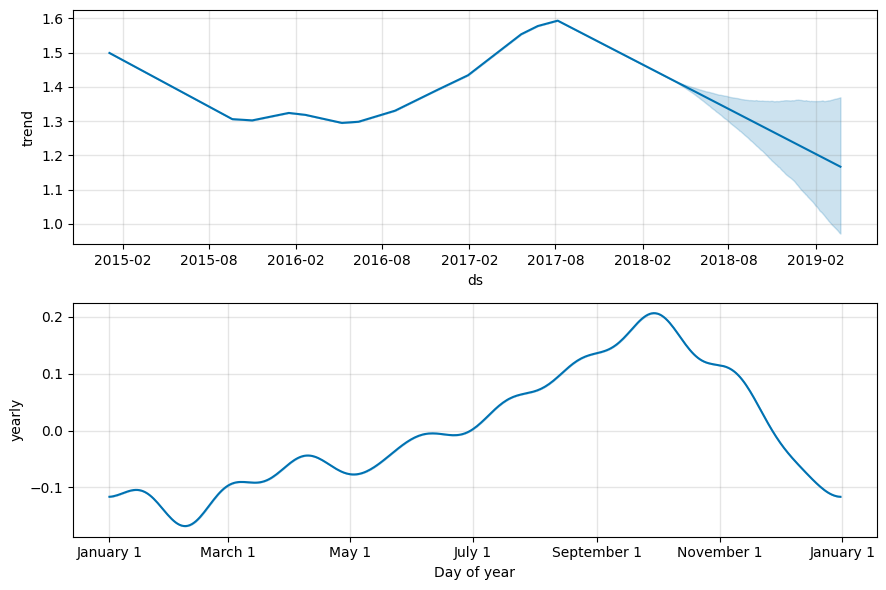

In [22]:
figure = m.plot_components(forecast)

In [25]:
avocado_df_sample = avocado_df [ avocado_df['region'] == 'West']
avocado_df_sample.head()

,Unnamed: 0,Date,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,type,year,region
2755,51,2015-01-04,0.89,5794410.58,2275446.87,2582300.65,97024.09,839638.97,688813.01,150819.57,6.39,conventional,2015,West
11881,51,2015-01-04,1.40,187548.30,70313.71,72942.11,24.30,44268.18,10023.72,34244.46,0.00,organic,2015,West
2754,50,2015-01-11,0.95,5333097.71,2203111.92,2292761.26,127412.09,709812.44,598705.08,111073.82,33.54,conventional,2015,West
11880,50,2015-01-11,1.39,223156.55,80139.16,111395.01,63.88,31558.50,9296.76,22261.74,0.00,organic,2015,West
11879,49,2015-01-18,1.33,251749.94,64328.76,147608.30,69.05,39743.83,7442.17,32301.66,0.00,organic,2015,West


In [27]:
avocado_df_sample.sort_values('Date')
avocado_df_sample.head()

,Unnamed: 0,Date,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,type,year,region
2755,51,2015-01-04,0.89,5794410.58,2275446.87,2582300.65,97024.09,839638.97,688813.01,150819.57,6.39,conventional,2015,West
11881,51,2015-01-04,1.40,187548.30,70313.71,72942.11,24.30,44268.18,10023.72,34244.46,0.00,organic,2015,West
2754,50,2015-01-11,0.95,5333097.71,2203111.92,2292761.26,127412.09,709812.44,598705.08,111073.82,33.54,conventional,2015,West
11880,50,2015-01-11,1.39,223156.55,80139.16,111395.01,63.88,31558.50,9296.76,22261.74,0.00,organic,2015,West
11879,49,2015-01-18,1.33,251749.94,64328.76,147608.30,69.05,39743.83,7442.17,32301.66,0.00,organic,2015,West


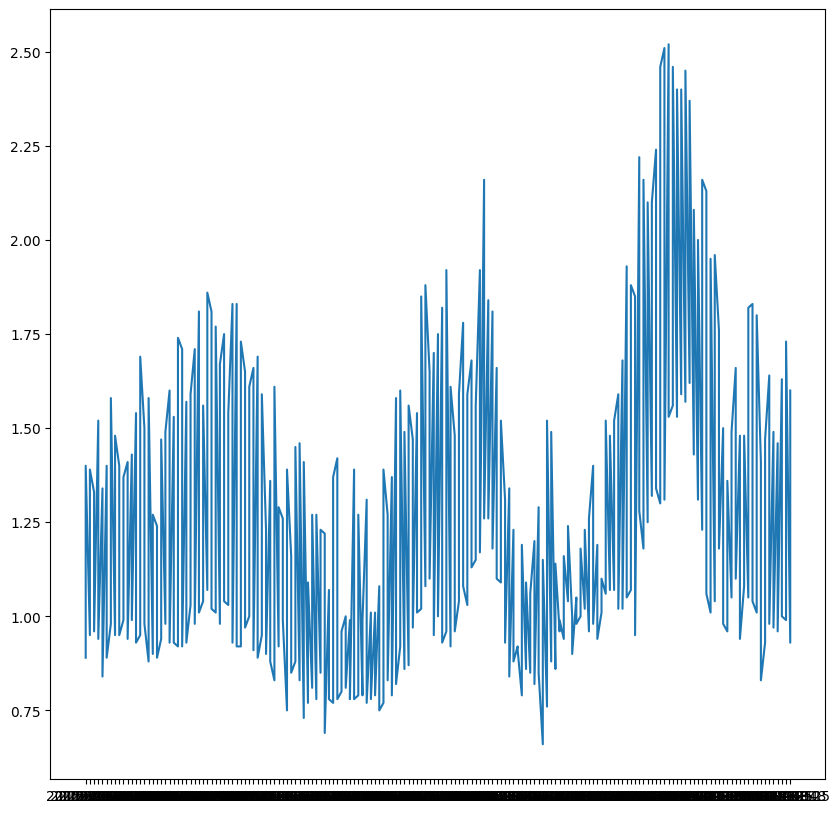

In [29]:
plt.figure(figsize = (10,10))
plt.plot(avocado_df_sample['Date'], avocado_df_sample['AveragePrice'])

In [30]:
avocado_df_sample = avocado_df_sample.rename(columns = {'Date': 'ds', 'AveragePrice':'y'})
avocado_df_sample.head()

,Unnamed: 0,ds,y,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,type,year,region
2755,51,2015-01-04,0.89,5794410.58,2275446.87,2582300.65,97024.09,839638.97,688813.01,150819.57,6.39,conventional,2015,West
11881,51,2015-01-04,1.40,187548.30,70313.71,72942.11,24.30,44268.18,10023.72,34244.46,0.00,organic,2015,West
2754,50,2015-01-11,0.95,5333097.71,2203111.92,2292761.26,127412.09,709812.44,598705.08,111073.82,33.54,conventional,2015,West
11880,50,2015-01-11,1.39,223156.55,80139.16,111395.01,63.88,31558.50,9296.76,22261.74,0.00,organic,2015,West
11879,49,2015-01-18,1.33,251749.94,64328.76,147608.30,69.05,39743.83,7442.17,32301.66,0.00,organic,2015,West


In [31]:
m = Prophet()
m.fit(avocado_df_sample)

23:59:46 - cmdstanpy - INFO - Chain [1] start processing
23:59:47 - cmdstanpy - INFO - Chain [1] done processing


In [32]:
future = m.make_future_dataframe(periods = 365)
forecast = m.predict(future)

/Users/hashimkhan/Library/Mobile Documents/com~apple~CloudDocs/machine_learning_practice/scrolls/lib/python3.11/site-packages/prophet/plot.py:72: FutureWarning: The behavior of DatetimeProperties.to_pydatetime is deprecated, in a future version this will return a Series containing python datetime objects instead of an ndarray. To retain the old behavior, call `np.array` on the result
  fcst_t = fcst['ds'].dt.to_pydatetime()
/Users/hashimkhan/Library/Mobile Documents/com~apple~CloudDocs/machine_learning_practice/scrolls/lib/python3.11/site-packages/prophet/plot.py:73: FutureWarning: The behavior of DatetimeProperties.to_pydatetime is deprecated, in a future version this will return a Series containing python datetime objects instead of an ndarray. To retain the old behavior, call `np.array` on the result
  ax.plot(m.history['ds'].dt.to_pydatetime(), m.history['y'], 'k.',


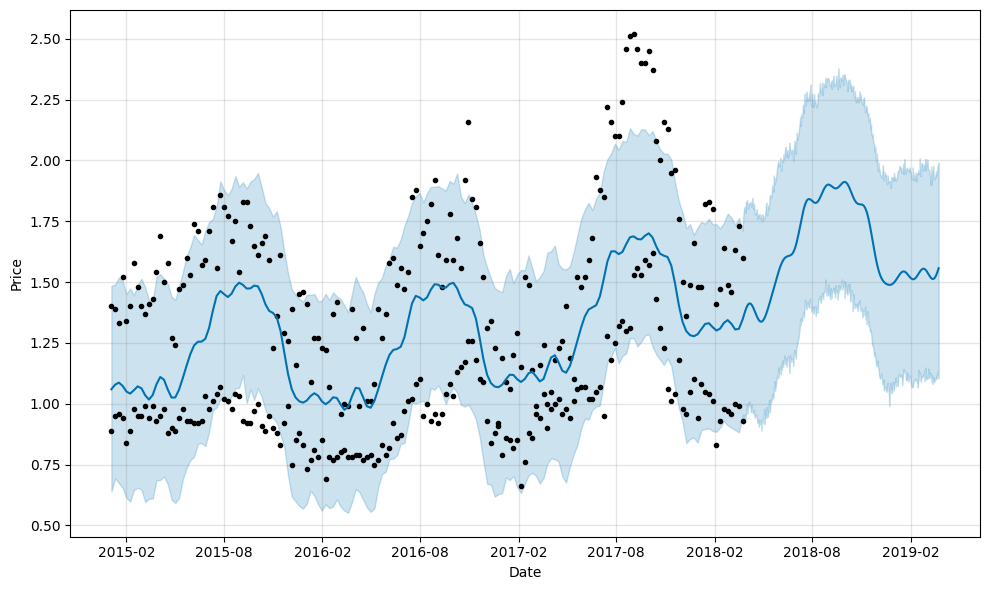

In [33]:
figure = m.plot(forecast, xlabel = 'Date', ylabel = 'Price')

/Users/hashimkhan/Library/Mobile Documents/com~apple~CloudDocs/machine_learning_practice/scrolls/lib/python3.11/site-packages/prophet/plot.py:228: FutureWarning: The behavior of DatetimeProperties.to_pydatetime is deprecated, in a future version this will return a Series containing python datetime objects instead of an ndarray. To retain the old behavior, call `np.array` on the result
  fcst_t = fcst['ds'].dt.to_pydatetime()
/Users/hashimkhan/Library/Mobile Documents/com~apple~CloudDocs/machine_learning_practice/scrolls/lib/python3.11/site-packages/prophet/plot.py:351: FutureWarning: The behavior of DatetimeProperties.to_pydatetime is deprecated, in a future version this will return a Series containing python datetime objects instead of an ndarray. To retain the old behavior, call `np.array` on the result
  df_y['ds'].dt.to_pydatetime(), seas[name], ls='-', c='#0072B2')
/Users/hashimkhan/Library/Mobile Documents/com~apple~CloudDocs/machine_learning_practice/scrolls/lib/python3.11/site-

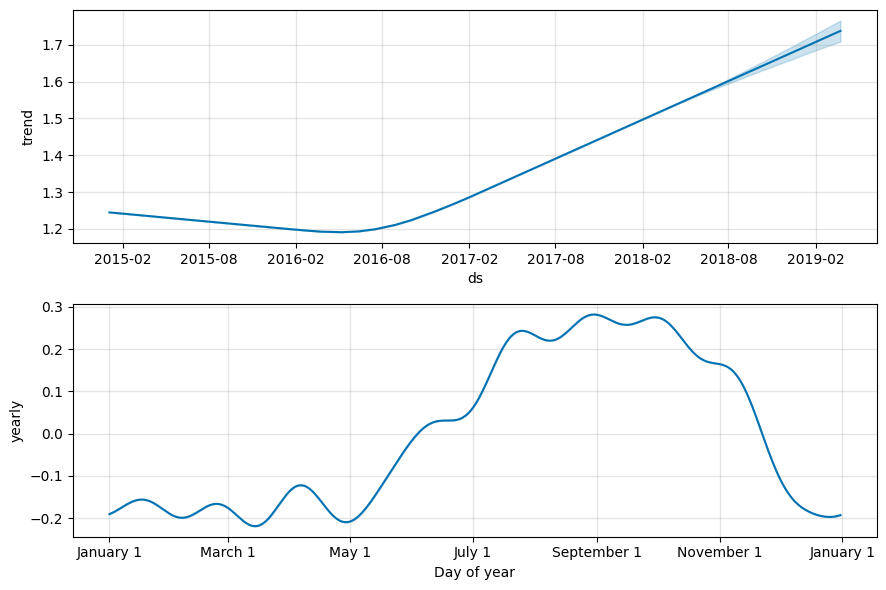

In [34]:
figure = m.plot_components(forecast)